# Quiz 3 -17 de octubre de 2018
# John Alexis Munera Mejia
Ya conocemos el efecto de la derivación cuando tomamos como vecinos los píxeles más cercanos, ahora queremos saber qué pasa si los vecinos que se usan para derivar no son los vecinos inmediatos, para ello deberás implementar un algoritmo que siga los siguientes pasos:

1. Selecciona una imagen a color de tu preferencia (no olvides subir la figura).
2. Realiza el procedimiento para cada uno de los canales.
3. Fija un valor de $\Delta x = 6,10,20$.
4. En cada uno de los píxeles de la imagen encuentra la derivada pero teniendo en cuenta el $\Delta x$.
5. Establece una imagen, del mismo tamaño de la imagen original, de tres canales. Fija en cada uno de los canales el resultado de la derivada para cada uno de los píxeles.
6. Une nuevamente los canales y muestra la figura resultante.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
# implementacion derivada central
def derivar_centrada(indice, delta, vector):
    # accedo en una fila de la imagen al punto necesesario dado delta/2
    return int(round((vector[int(indice + (delta/2))] - vector[int(indice - (delta/2))])/delta))

In [3]:
# implementacion derivada progresiva
def derivar_progresiva(indice, delta, vector):
    # accedo en una fila de la imagen al punto + delta
    return int(round((vector[indice + delta] - vector[indice])/delta))

In [4]:
def derivar_regresiva(indice, delta, vector):
    # accedo en una fila de la imagen al punto - delta
    return int(round((vector[indice] - vector[indice - delta])/delta))

In [5]:
def derivar_canal(canal, limpio, delta):
    for row in range(np.shape(canal)[0]): # recorro la imagen por fila
        for column in range(np.shape(canal)[1]): # recorro por columna
            if column == 0 or (column < delta/2): # verifico si la columna es 0 o menor a delta/2 para evitar fallo de indices
                limpio[row][column] = derivar_progresiva(column, delta, canal[row])
            # verifico si la columna es la ultima o es mayor a la mitad del delta para evitar fallo de indice
            elif column == (len(canal[row]) - 1) or ((column + delta/2) > len(canal[row])-1) :
                limpio[row][column] = derivar_regresiva(column, delta, canal[row])
            # en cualquier otro caso uso centrada
            else:
                limpio[row][column] = derivar_centrada(column, delta, canal[row])

In [6]:
def derivar_imagen(imagen, delta):
    B = imagen[:, :, 0] # separo canales
    G = imagen[:, :, 1]
    R = imagen[:, :, 2]
    R_limpia = np.zeros(np.shape(R)) # genero canales limpios
    B_limpia = np.zeros(np.shape(B))
    G_limpia = np.zeros(np.shape(G))
    derivar_canal(B, B_limpia, delta) # derivo cada canal con el delta correspondiente
    derivar_canal(G, G_limpia, delta)
    derivar_canal(R, R_limpia, delta)
    zipped = np.dstack((R_limpia, G_limpia, B_limpia)) # creo una nueva imagen con los canales generados
    return zipped

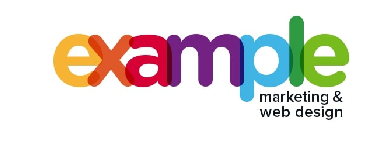

In [7]:
imagen = cv.imread('example.jpg')
plt.axis('off')
plt.imshow(cv.cvtColor(imagen, cv.COLOR_BGR2RGB))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


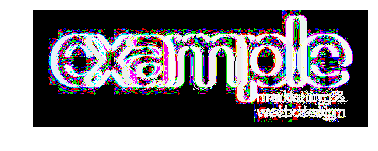

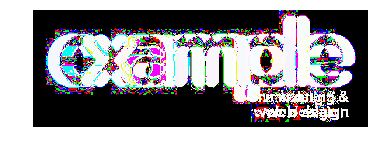

In [8]:
for delta in [6, 10, 20]: # defino deltas
    plt.axis('off')
    plt.imshow(derivar_imagen(imagen, delta)) # aplico derivacion con cada uno de los deltas
    plt.show()
# Se logra notar como la distancia entre los bordes y tambien el ruido va aumentando a medida que se aumenta el delta